In [4]:
import atooms
from atooms.trajectory import TrajectoryXYZ
import atooms.postprocessing as pp

In [19]:
 
def convert_xyz(filename,rho):
        c = open(filename+".atooms.xyz", 'w')
        step = 0
        with open(filename) as fin:
            for line in  fin:
                if len(line.split())==1:
                    if line[0]=='A':
                        
                        c.write(f"step:{step} columns:name,pos cell:{L},{L},{L} dt:1\n")
                        step+=1
                    else:
                        N = int(line)
                        L = (N/rho)**(1./3)
                        c.write(line)
                else:
                    c.write(line)

In [23]:
import matplotlib.pyplot as pl

In [26]:
from stringato import extract_floats as ef

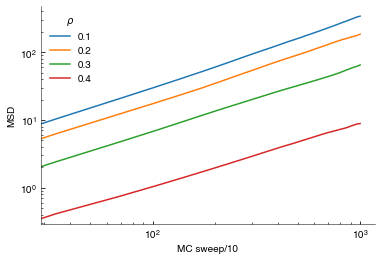

In [32]:
files = ["rho0.1-Pe60.xyz","rho0.2-Pe60.xyz","rho0.3-Pe60.xyz","rho0.4-Pe60.xyz"]
for f in files:
    rho = float(ef(f)[0])
    convert_xyz(f,rho)
    with TrajectoryXYZ(f+".atooms.xyz") as th:
    #     print(th[0].cell)
        msd = pp.MeanSquareDisplacement(th)
        msd.do()
        pl.loglog(msd.grid, msd.value, label=str(rho))
pl.xlabel("MC sweep/10")
pl.ylabel("MSD")
pl.legend(frameon=False, title=r"$\rho$")
pl.savefig("msdPe60.pdf")